In [ ]:

import pandas as pd
df=pd.read_csv("/content/youtube_ad_revenue_dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122400 entries, 0 to 122399
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   video_id              122400 non-null  object 
 1   date                  122400 non-null  object 
 2   views                 122400 non-null  int64  
 3   likes                 116283 non-null  float64
 4   comments              116288 non-null  float64
 5   watch_time_minutes    116295 non-null  float64
 6   video_length_minutes  122400 non-null  float64
 7   subscribers           122400 non-null  int64  
 8   category              122400 non-null  object 
 9   device                122400 non-null  object 
 10  country               122400 non-null  object 
 11  ad_revenue_usd        122400 non-null  float64
dtypes: float64(5), int64(2), object(5)
memory usage: 11.2+ MB


In [ ]:
df.shape

(122400, 12)

In [ ]:
df.isnull().sum()

,0
video_id,0
date,0
views,0
likes,6117
comments,6112
watch_time_minutes,6105
video_length_minutes,0
subscribers,0
category,0
device,0


In [ ]:
# Fill missing numeric columns
for col in ['likes', 'comments', 'watch_time_minutes']:
    df[col] = df[col].fillna(df[col].median())

In [ ]:
df.drop_duplicates(inplace=True)
print("After removing duplicates:", df.shape)

After removing duplicates: (120000, 12)


In [ ]:
df = pd.get_dummies(df, columns=['category', 'device', 'country'], drop_first=True)


In [ ]:
import numpy as np

df['engagement_rate'] = (df['likes'] + df['comments']) / df['views'].replace(0, np.nan)
df['engagement_rate'] = df['engagement_rate'].fillna(0)

df['watch_ratio'] = df['watch_time_minutes'] / df['video_length_minutes'].replace(0, np.nan)
df['watch_ratio'] = df['watch_ratio'].fillna(0)

df['views_per_subscriber'] = df['views'] / df['subscribers'].replace(0, np.nan)
df['views_per_subscriber'] = df['views_per_subscriber'].fillna(0)


In [ ]:
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 120000 entries, 0 to 122399
Data columns (total 25 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   video_id                120000 non-null  object 
 1   date                    120000 non-null  object 
 2   views                   120000 non-null  int64  
 3   likes                   120000 non-null  float64
 4   comments                120000 non-null  float64
 5   watch_time_minutes      120000 non-null  float64
 6   video_length_minutes    120000 non-null  float64
 7   subscribers             120000 non-null  int64  
 8   ad_revenue_usd          120000 non-null  float64
 9   category_Entertainment  120000 non-null  bool   
 10  category_Gaming         120000 non-null  bool   
 11  category_Lifestyle      120000 non-null  bool   
 12  category_Music          120000 non-null  bool   
 13  category_Tech           120000 non-null  bool   
 14  device_Mobile           1

,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,ad_revenue_usd,engagement_rate,watch_ratio,views_per_subscriber
count,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000
mean,9999.832333,1099.755792,274.332350,37540.311942,16.017910,502291.970050,252.711361,0.137415,3628.979444,0.068675
std,99.918405,506.372458,126.461529,12658.957210,8.084928,288364.967705,61.954125,0.052160,3614.733561,0.303532
min,9521.000000,195.000000,48.000000,14659.105562,2.000142,1005.000000,126.590603,0.025492,497.187172,0.009704
25%,9933.000000,673.000000,168.000000,26949.914101,9.005928,252641.500000,199.892158,0.094965,1544.780597,0.013290
50%,10000.000000,1103.000000,274.000000,37531.990337,16.009269,503633.500000,252.678607,0.137523,2342.059382,0.019842
75%,10067.000000,1524.000000,381.000000,48209.880123,23.026064,752386.250000,305.613497,0.179921,4163.269059,0.039594
max,10468.000000,2061.000000,515.000000,61557.670089,29.999799,999997.000000,382.768254,0.249554,29731.766041,9.972495


In [ ]:
# Exploratory Data Analysis (EDA)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Shape and column types
print(df.shape)
print(df.dtypes)

# Summary statistics
display(df.describe())

# Missing values check
df.isna().sum().sort_values(ascending=False)


(120000, 25)
video_id                   object
date                       object
views                       int64
likes                     float64
comments                  float64
watch_time_minutes        float64
video_length_minutes      float64
subscribers                 int64
ad_revenue_usd            float64
category_Entertainment       bool
category_Gaming              bool
category_Lifestyle           bool
category_Music               bool
category_Tech                bool
device_Mobile                bool
device_TV                    bool
device_Tablet                bool
country_CA                   bool
country_DE                   bool
country_IN                   bool
country_UK                   bool
country_US                   bool
engagement_rate           float64
watch_ratio               float64
views_per_subscriber      float64
dtype: object


,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,ad_revenue_usd,engagement_rate,watch_ratio,views_per_subscriber
count,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000
mean,9999.832333,1099.755792,274.332350,37540.311942,16.017910,502291.970050,252.711361,0.137415,3628.979444,0.068675
std,99.918405,506.372458,126.461529,12658.957210,8.084928,288364.967705,61.954125,0.052160,3614.733561,0.303532
min,9521.000000,195.000000,48.000000,14659.105562,2.000142,1005.000000,126.590603,0.025492,497.187172,0.009704
25%,9933.000000,673.000000,168.000000,26949.914101,9.005928,252641.500000,199.892158,0.094965,1544.780597,0.013290
50%,10000.000000,1103.000000,274.000000,37531.990337,16.009269,503633.500000,252.678607,0.137523,2342.059382,0.019842
75%,10067.000000,1524.000000,381.000000,48209.880123,23.026064,752386.250000,305.613497,0.179921,4163.269059,0.039594
max,10468.000000,2061.000000,515.000000,61557.670089,29.999799,999997.000000,382.768254,0.249554,29731.766041,9.972495


,0
video_id,0
date,0
views,0
likes,0
comments,0
watch_time_minutes,0
video_length_minutes,0
subscribers,0
ad_revenue_usd,0
category_Entertainment,0


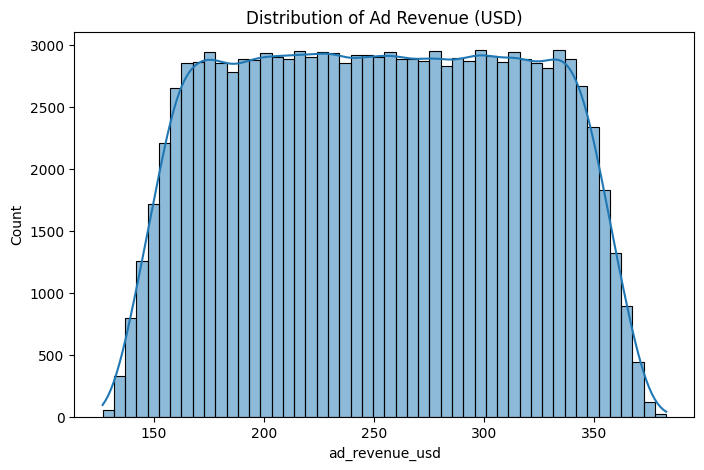

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['ad_revenue_usd'], bins=50, kde=True)
plt.title("Distribution of Ad Revenue (USD)")
plt.show()


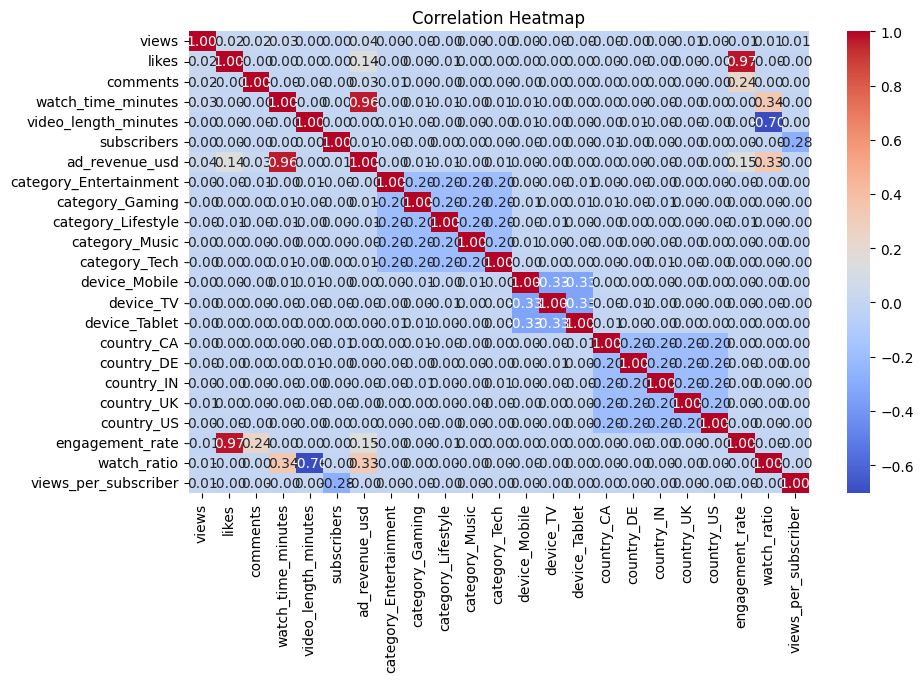

In [ ]:
plt.figure(figsize=(10,6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

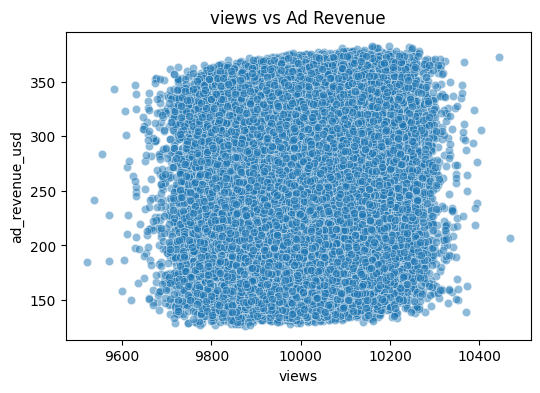

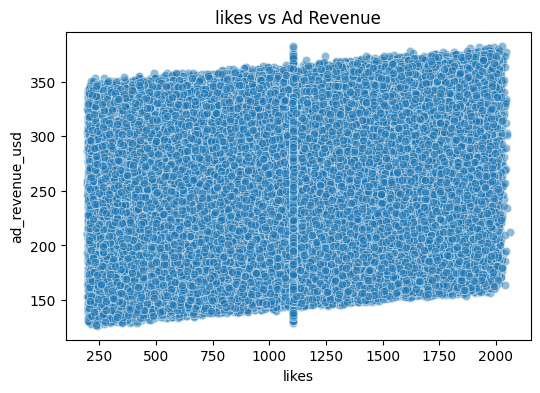

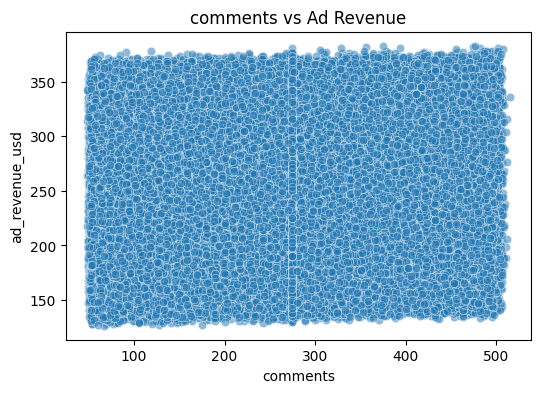

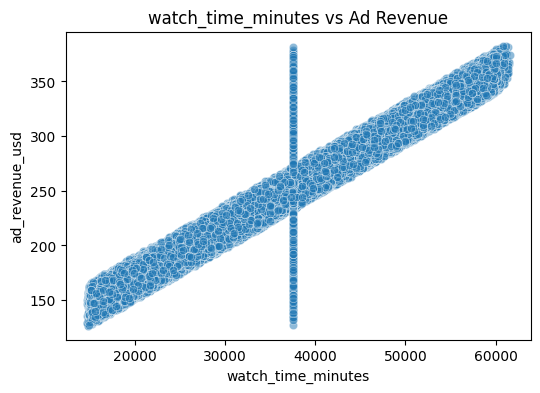

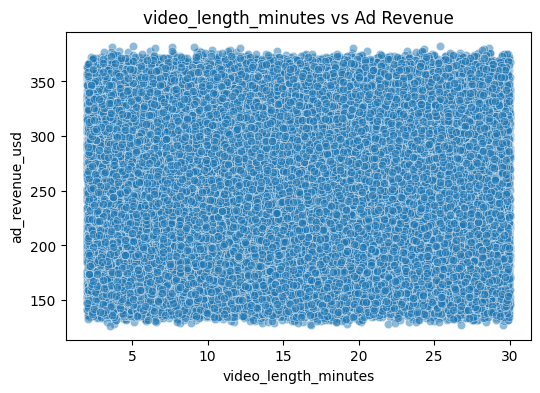

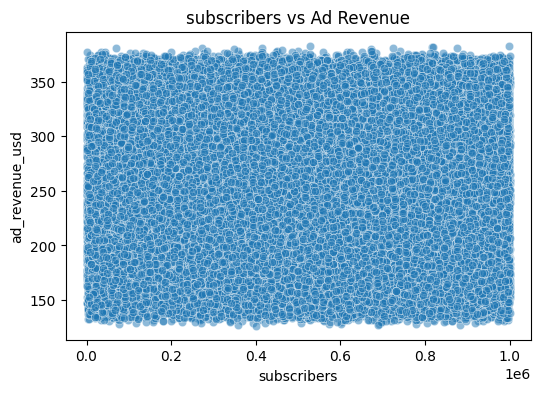

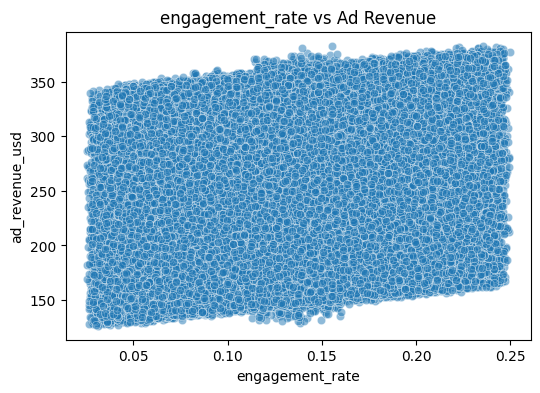

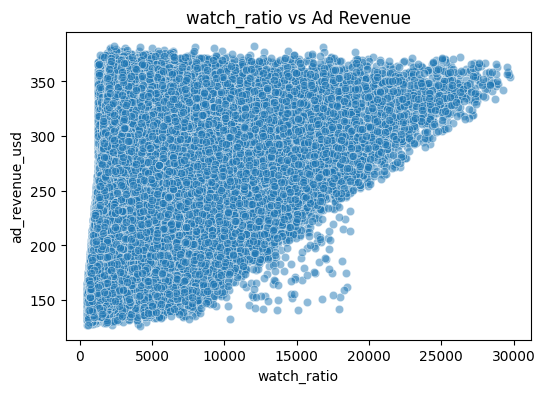

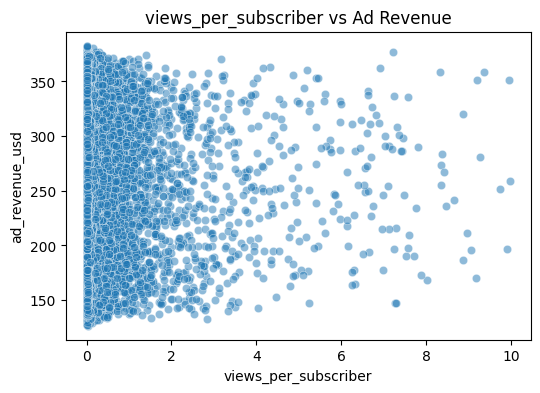

In [ ]:
num_features = ['views', 'likes', 'comments', 'watch_time_minutes', 'video_length_minutes', 'subscribers',
                'engagement_rate', 'watch_ratio', 'views_per_subscriber']

for col in num_features:
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=df, x=col, y='ad_revenue_usd', alpha=0.5)
    plt.title(f"{col} vs Ad Revenue")
    plt.show()


In [ ]:
country_cols = [col for col in df.columns if col.startswith('country_')]
print(country_cols)



['country_CA', 'country_DE', 'country_IN', 'country_UK', 'country_US']


In [ ]:
df[country_cols + ['ad_revenue_usd']].corr()['ad_revenue_usd'].sort_values(ascending=False)


,ad_revenue_usd
ad_revenue_usd,1.000000
country_US,0.003342
country_CA,0.000898
country_DE,0.000274
country_UK,-0.001118
country_IN,-0.001580


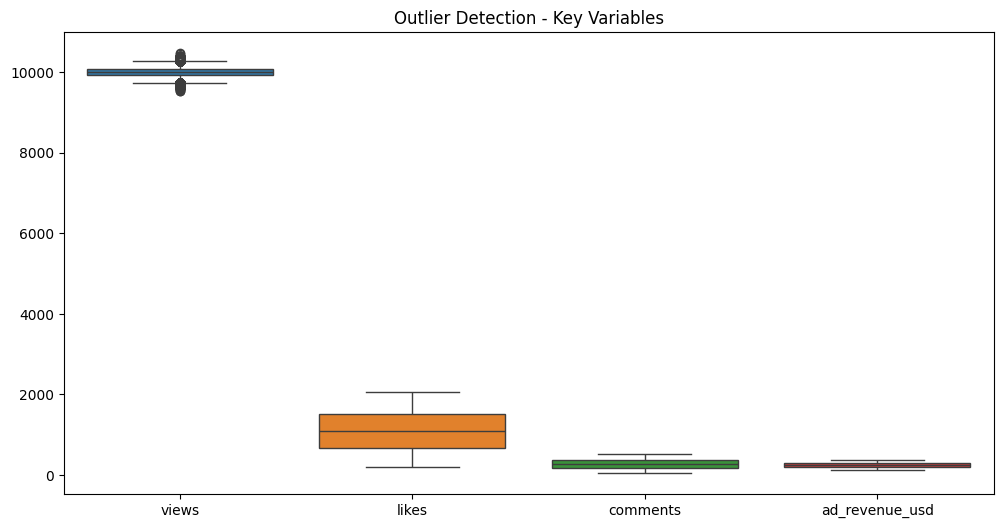

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[['views', 'likes', 'comments', 'ad_revenue_usd']])
plt.title("Outlier Detection - Key Variables")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

# Define target and features
X = df.drop('ad_revenue_usd', axis=1)
y = df['ad_revenue_usd']

# Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [ ]:
cat_cols = ['video_id', 'category', 'device', 'country']

In [ ]:
print(X.columns.tolist())

['video_id', 'date', 'views', 'likes', 'comments', 'watch_time_minutes', 'video_length_minutes', 'subscribers', 'category_Entertainment', 'category_Gaming', 'category_Lifestyle', 'category_Music', 'category_Tech', 'device_Mobile', 'device_TV', 'device_Tablet', 'country_CA', 'country_DE', 'country_IN', 'country_UK', 'country_US', 'engagement_rate', 'watch_ratio', 'views_per_subscriber']


In [ ]:
# show the first few rows and column list
print("Columns in df:\n", df.columns.tolist())
print("\nColumns in X (if defined):\n", globals().get('X').columns.tolist() if 'X' in globals() else "X not defined")

# show object (string) columns in df
print("\nObject dtype columns in df:", df.select_dtypes(include=['object', 'category']).columns.tolist())

# show first 5 rows to inspect values
display(df.head())

Columns in df:
 ['video_id', 'date', 'views', 'likes', 'comments', 'watch_time_minutes', 'video_length_minutes', 'subscribers', 'ad_revenue_usd', 'category_Entertainment', 'category_Gaming', 'category_Lifestyle', 'category_Music', 'category_Tech', 'device_Mobile', 'device_TV', 'device_Tablet', 'country_CA', 'country_DE', 'country_IN', 'country_UK', 'country_US', 'engagement_rate', 'watch_ratio', 'views_per_subscriber']

Columns in X (if defined):
 ['video_id', 'date', 'views', 'likes', 'comments', 'watch_time_minutes', 'video_length_minutes', 'subscribers', 'category_Entertainment', 'category_Gaming', 'category_Lifestyle', 'category_Music', 'category_Tech', 'device_Mobile', 'device_TV', 'device_Tablet', 'country_CA', 'country_DE', 'country_IN', 'country_UK', 'country_US', 'engagement_rate', 'watch_ratio', 'views_per_subscriber']

Object dtype columns in df: ['video_id', 'date']


,video_id,date,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,ad_revenue_usd,category_Entertainment,...,device_TV,device_Tablet,country_CA,country_DE,country_IN,country_UK,country_US,engagement_rate,watch_ratio,views_per_subscriber
0,vid_3092,2024-09-24 10:50:40.993199,9936,1221.0,320.0,26497.214184,2.862137,228086,203.178237,True,...,True,False,False,False,True,False,False,0.155093,9257.844017,0.043563
1,vid_3459,2024-09-22 10:50:40.993199,10017,642.0,346.0,15209.747445,23.738069,736015,140.880508,False,...,False,True,True,False,False,False,False,0.098632,640.732307,0.013610
2,vid_4784,2024-11-21 10:50:40.993199,10097,1979.0,187.0,57332.658498,26.200634,240534,360.134008,False,...,True,False,True,False,False,False,False,0.214519,2188.216490,0.041977
3,vid_4078,2025-01-28 10:50:40.993199,10034,1191.0,242.0,31334.517771,11.770340,434482,224.638261,True,...,False,False,False,False,False,True,False,0.142814,2662.159087,0.023094
4,vid_3522,2025-04-28 10:50:40.993199,9889,1858.0,477.0,15665.666434,6.635854,42030,165.514388,False,...,False,False,True,False,False,False,False,0.236121,2360.761216,0.235284


In [ ]:
# ---------------------------------------------------------
# Step 5 (Alternative): Model Building with Time-based Split
# ---------------------------------------------------------
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# Ensure 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Sort data by date for realistic time-based split
df_time = df.sort_values(by='date').reset_index(drop=True)

# Define features and target
X_time = df_time.drop(columns=['video_id', 'ad_revenue_usd'], errors='ignore')
y_time = df_time['ad_revenue_usd']

# Determine split index (80% oldest data for training, 20% newest for testing)
split_idx = int(len(df_time) * 0.8)
X_train = X_time.iloc[:split_idx].drop(columns=['date'])
X_test  = X_time.iloc[split_idx:].drop(columns=['date'])
y_train = y_time.iloc[:split_idx]
y_test  = y_time.iloc[split_idx:]

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# Train Random Forest model
rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train_scaled, y_train)

# Make predictions
preds = rf.predict(X_test_scaled)

# Evaluate performance
mae = mean_absolute_error(y_test, preds)
try:
    rmse = mean_squared_error(y_test, preds, squared=False)
except TypeError:
    rmse = np.sqrt(mean_squared_error(y_test, preds))
r2 = r2_score(y_test, preds)

print("📊 Model Performance (Time-based Split)")
print("--------------------------------------")
print(f"MAE  : {mae:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"R²   : {r2:.4f}")

# Save model and scaler for reuse (e.g., in Streamlit)
joblib.dump(rf, "best_model_time_split.pkl")
joblib.dump(scaler, "scaler_time_split.pkl")
print("\n✅ Saved: best_model_time_split.pkl and scaler_time_split.pkl")



📊 Model Performance (Time-based Split)
--------------------------------------
MAE  : 3.6344
RMSE : 14.0023
R²   : 0.9486

✅ Saved: best_model_time_split.pkl and scaler_time_split.pkl


🔝 Top 10 Most Important Features for Ad Revenue:
                 Feature  Importance
3     watch_time_minutes    0.933299
19       engagement_rate    0.025644
0                  views    0.006624
1                  likes    0.006118
2               comments    0.005469
5            subscribers    0.003988
21  views_per_subscriber    0.003939
4   video_length_minutes    0.003902
20           watch_ratio    0.003817
11         device_Mobile    0.000600


/tmp/ipython-input-1241012330.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(10), palette='viridis')


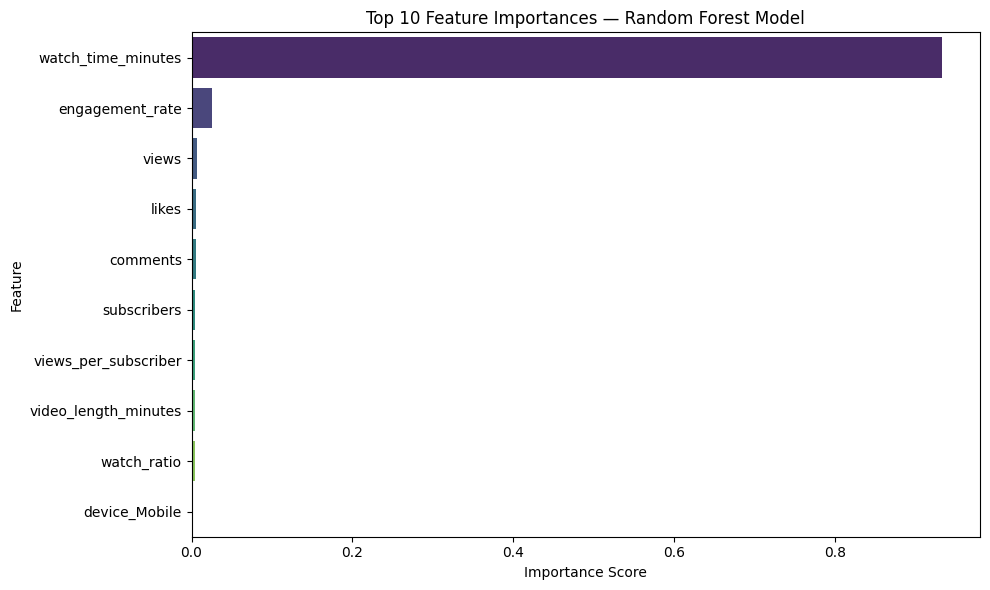

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get feature importances from the trained RandomForest model
importances = rf.feature_importances_
feature_names = X_train.columns
indices = np.argsort(importances)[::-1]

# Create a DataFrame for easy viewing
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display top 10 features
print("🔝 Top 10 Most Important Features for Ad Revenue:")
print(feat_imp_df.head(10))

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(10), palette='viridis')
plt.title('Top 10 Feature Importances — Random Forest Model')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [ ]:
!pip install streamlit pyngrok -q


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 36.0 MB/s eta 0:00:00


In [ ]:
from pyngrok import ngrok

# Replace with your own token from https://dashboard.ngrok.com/get-started/your-authtoken
ngrok.set_auth_token("33W9IXceAroYV3mge5rdq67S1Mm_6yw6afTVymn9wUQ3pJsM3")


In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import joblib
import os

st.set_page_config(page_title="🎬 YouTube Ad Revenue Predictor", layout="wide")
st.title("📈 YouTube Ad Revenue Prediction Dashboard")
st.write("Predict ad revenue and explore feature insights based on your video metrics.")

# -------------------------
# Sidebar inputs
# -------------------------
st.sidebar.header("Input Features")
views = st.sidebar.number_input("Views", min_value=0, value=10000)
likes = st.sidebar.number_input("Likes", min_value=0, value=500)
comments = st.sidebar.number_input("Comments", min_value=0, value=100)
watch_time = st.sidebar.number_input("Watch Time (minutes)", min_value=0.0, value=20000.0)
video_length = st.sidebar.number_input("Video Length (minutes)", min_value=0.0, value=10.0)
subscribers = st.sidebar.number_input("Subscribers", min_value=0, value=50000)
engagement_rate = st.sidebar.slider("Engagement Rate", 0.0, 1.0, 0.15)
watch_ratio = st.sidebar.number_input("Watch Ratio", min_value=0.0, value=3000.0)
views_per_sub = st.sidebar.slider("Views per Subscriber", 0.0, 1.0, 0.05)

# Category / Device / Country selections
category = st.sidebar.selectbox("Category", ["Entertainment", "Gaming", "Lifestyle", "Music", "Tech"])
device = st.sidebar.selectbox("Device", ["Mobile", "TV", "Tablet"])
country = st.sidebar.selectbox("Country", ["CA", "DE", "IN", "UK", "US"])

# -------------------------
# Build input DataFrame
# -------------------------
input_data = pd.DataFrame({
    "views": [views],
    "likes": [likes],
    "comments": [comments],
    "watch_time_minutes": [watch_time],
    "video_length_minutes": [video_length],
    "subscribers": [subscribers],
    "engagement_rate": [engagement_rate],
    "watch_ratio": [watch_ratio],
    "views_per_subscriber": [views_per_sub],
    # create explicit one-hot columns used by your training set (adjust as needed)
    "category_Entertainment": [1 if category=="Entertainment" else 0],
    "category_Gaming": [1 if category=="Gaming" else 0],
    "category_Lifestyle": [1 if category=="Lifestyle" else 0],
    "category_Music": [1 if category=="Music" else 0],
    "category_Tech": [1 if category=="Tech" else 0],
    "device_Mobile": [1 if device=="Mobile" else 0],
    "device_TV": [1 if device=="TV" else 0],
    "device_Tablet": [1 if device=="Tablet" else 0],
    "country_CA": [1 if country=="CA" else 0],
    "country_DE": [1 if country=="DE" else 0],
    "country_IN": [1 if country=="IN" else 0],
    "country_UK": [1 if country=="UK" else 0],
    "country_US": [1 if country=="US" else 0],
})

# Ensure numeric dtype
input_data = input_data.astype(float)

# -------------------------
# Load artifacts (try pipeline first)
# -------------------------
pipeline = None
model = None
scaler = None
artifact_dir = "."  # change if artifacts are in another folder

# Try loading a pipeline that contains preprocessing + model
pipeline_path = os.path.join(artifact_dir, "best_pipeline.pkl")
if os.path.exists(pipeline_path):
    try:
        p = joblib.load(pipeline_path)
        # If you saved a dict with pipeline inside, handle that
        if isinstance(p, dict) and 'pipeline' in p:
            pipeline = p['pipeline']
            _meta = p  # keep meta if any
        else:
            pipeline = p
        st.success("Loaded pipeline from artifacts/best_pipeline.pkl")
    except Exception as e:
        st.error(f"Failed to load pipeline: {e}")

# Fallback: load separate scaler + model
if pipeline is None:
    model_path = os.path.join(artifact_dir, "best_model_time_split.pkl")
    scaler_path = os.path.join(artifact_dir, "scaler_time_split.pkl")
    try:
        if os.path.exists(model_path):
            model = joblib.load(model_path)
            st.success(f"Loaded model from {model_path}")
        if os.path.exists(scaler_path):
            scaler = joblib.load(scaler_path)
            st.success(f"Loaded scaler from {scaler_path}")
    except Exception as e:
        st.error(f"Failed to load model/scaler: {e}")

# -------------------------
# Align input features to expected order
# -------------------------
def align_input_to_expected(df_input, expected_cols):
    # add missing columns with zeros, drop extras, and return in expected order
    for c in expected_cols:
        if c not in df_input.columns:
            df_input[c] = 0.0
    # Keep only expected columns
    df_input = df_input[expected_cols]
    return df_input

# Determine expected feature order
expected_cols = None
if pipeline is not None:
    # If pipeline was trained from a dataframe and saved with metadata, try meta keys
    if isinstance(p, dict) and 'numeric_feats' in p:
        # assemble expected col list as numeric + cat (works if you saved these)
        expected_cols = list(p.get('numeric_feats', [])) + list(p.get('cat_feats', []))
    # fallback to pipeline's preprocessor (best-effort)
    # NOTE: extracting exact final column names from ColumnTransformer can be tricky; we'll try safe heuristics below
elif scaler is not None and hasattr(scaler, "feature_names_in_"):
    expected_cols = list(scaler.feature_names_in_)

# If we have expected_cols, align; otherwise keep current order (but warn)
if expected_cols is not None:
    input_aligned = align_input_to_expected(input_data.copy(), expected_cols)
else:
    input_aligned = input_data.copy()
    st.info("No expected feature order found — using current input column order. If prediction fails, save the training feature order and load it here.")

# -------------------------
# Prediction
# -------------------------
if st.sidebar.button("Predict Ad Revenue 💰"):
    try:
        if pipeline is not None:
            pred = pipeline.predict(input_aligned)[0]
        else:
            if scaler is not None:
                X_scaled = scaler.transform(input_aligned)
            else:
                X_scaled = input_aligned.values
            pred = model.predict(X_scaled)[0]
        # format
        st.metric("Predicted Ad Revenue (USD)", f"${pred:,.2f}")
    except Exception as e:
        st.error("Prediction failed.")
        st.write(f"Error: {e}")
        st.write("Common causes: mismatched feature order / missing columns / different preprocessing. "
                 "Ensure the app's expected features exactly match what the scaler/pipeline was trained on.")

# -------------------------
# Feature importance (optional)
# -------------------------
if st.checkbox("Show Feature Importance Chart"):
    try:
        # get underlying model
        underlying = None
        if pipeline is not None:
            # try common pipeline attribute names
            if hasattr(pipeline, "named_steps") and "model" in pipeline.named_steps:
                underlying = pipeline.named_steps["model"]
            else:
                # try the last step
                if hasattr(pipeline, "steps"):
                    underlying = pipeline.steps[-1][1]
        else:
            underlying = model

        if underlying is None:
            raise ValueError("Could not identify underlying estimator for feature importances.")

        if not hasattr(underlying, "feature_importances_"):
            st.warning("Model has no 'feature_importances_' attribute (likely a linear model).")
        else:
            importances = underlying.feature_importances_
            # determine feature names: prefer scaler.feature_names_in_, else expected_cols, else input columns
            if scaler is not None and hasattr(scaler, "feature_names_in_"):
                feat_names = list(scaler.feature_names_in_)
            elif expected_cols is not None:
                feat_names = expected_cols
            else:
                feat_names = list(input_aligned.columns)

            # If number of names mismatches importances, fallback to input columns
            if len(feat_names) != len(importances):
                feat_names = list(input_aligned.columns)
            fi_df = pd.DataFrame({"feature": feat_names, "importance": importances})
            fi_df = fi_df.sort_values("importance", ascending=False).head(20).reset_index(drop=True)
            st.subheader("Top feature importances")
            st.table(fi_df.style.format({"importance":"{:.4f}"}))
            st.bar_chart(fi_df.set_index("feature")["importance"])
    except Exception as e:
        st.error(f"Cannot show feature importances: {e}")


Overwriting app.py


In [ ]:
# Kill any previous tunnels (optional cleanup)
!pkill streamlit

# Start Streamlit app
get_ipython().system_raw('streamlit run app.py --server.port 8501 &')

# Create a public URL
from pyngrok import ngrok
public_url = ngrok.connect(8501)
public_url


<NgrokTunnel: "https://nonpsychopathic-overbrilliant-aaden.ngrok-free.dev" -> "http://localhost:8501">